# Frequentist Statistics with Scipy  

In [58]:
import numpy as np
from scipy import stats
import pandas as pd

from tkinter import filedialog

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [59]:
data_file = "iris_dataset.csv"

### Loading the dataset

In [60]:
dataset = pd.read_csv(data_file, sep=',', na_values=["."," ","na"]) # Can use lists for possible missing values
dataset.shape

(150, 5)

In [61]:
dataset.columns

Index(['Type', 'Petal_Width', 'Petal_Length', 'Sepal_Width', 'Sepal_Length'], dtype='object')

In [62]:
dataset.head(n=10)

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
0,setosa,2,14,33,50
1,virginica,24,56,31,67
2,virginica,23,51,31,69
3,setosa,2,10,36,46
4,virginica,20,52,30,65
5,virginica,19,51,27,58
6,versicolor,13,45,28,57
7,versicolor,16,47,33,63
8,virginica,17,45,25,49
9,versicolor,14,47,32,70


### Exploratory analysis

In [63]:
dataset.describe(percentiles=[.25, .5, .75], include='all')

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
count,150,150.000000,150.000000,150.000000,150.000000
unique,3,NaN,NaN,NaN,NaN
top,setosa,NaN,NaN,NaN,NaN
freq,50,NaN,NaN,NaN,NaN
mean,NaN,11.926667,37.786667,30.553333,58.446667
std,NaN,7.569008,17.776233,4.372791,8.268592
min,NaN,1.000000,10.000000,20.000000,43.000000
25%,NaN,3.000000,16.000000,28.000000,51.000000
50%,NaN,13.000000,44.000000,30.000000,58.000000
75%,NaN,18.000000,51.000000,33.000000,64.000000


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          150 non-null    object
 1   Petal_Width   150 non-null    int64 
 2   Petal_Length  150 non-null    int64 
 3   Sepal_Width   150 non-null    int64 
 4   Sepal_Length  150 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.0+ KB


In [8]:
grouped_iris = dataset.groupby('Type')
grouped_iris.mean()

,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
Type,,,,
setosa,2.46,14.62,34.28,50.10
versicolor,13.26,43.22,27.64,59.36
virginica,20.06,55.52,29.74,65.88


#### Exercise  
Create a table that describes the grouped_iris data frame, including the 25th, 50th, and 75th percentiles

In [9]:
grouped_iris.describe(percentiles=[.25, .5, .75], include='all')

Petal_Width                                                  \
                 count   mean       std   min   25%   50%    75%   max   
Type                                                                     
setosa            50.0   2.46  1.053856   1.0   2.0   2.0   3.00   6.0   
versicolor        50.0  13.26  1.977527  10.0  12.0  13.0  15.00  18.0   
virginica         50.0  20.06  2.902567  13.0  18.0  20.0  22.75  25.0   

           Petal_Length         ... Sepal_Width       Sepal_Length         \
                  count   mean  ...         75%   max        count   mean   
Type                            ...                                         
setosa             50.0  14.62  ...       36.75  44.0         50.0  50.10   
versicolor         50.0  43.22  ...       30.00  34.0         50.0  59.36   
virginica          50.0  55.52  ...       31.75  38.0         50.0  65.88   

                                                     
                 std   min    25%   50%   75%   max  
Type                                                 
setosa      3.535534  43.0  48.00  50.0  52.0  58.0  
versicolor  5.161711  49.0  56.00  59.0  63.0  70.0  
virginica   6.358796  49.0  62.25  65.0  69.0  79.0  

[3 rows x 32 columns]

Type
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Petal_Width, dtype: object

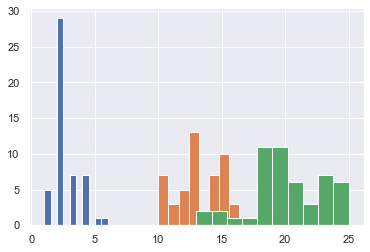

In [10]:
grouped_iris['Petal_Width'].hist()

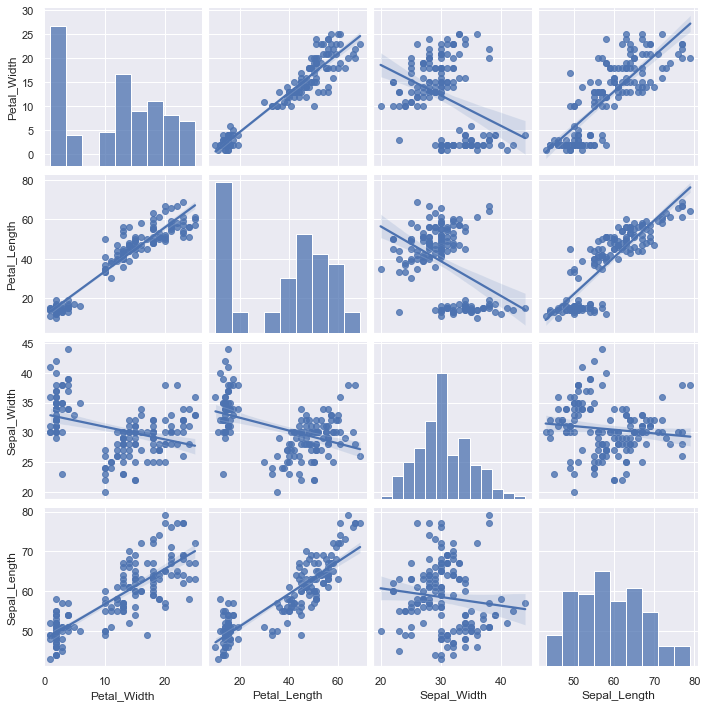

In [11]:
sns.pairplot(dataset, kind='reg')

### Data Extraction
For the statistical functions we will have to specify the dependent data variable and the independent data variable as two separate arrays

In [12]:
grouped_iris['Type'] # .groupby function returns a GroupBy object that is lazily executed

In [13]:
dataset[dataset['Type']=='setosa'].head(n=10) # Better to use the original dataset

,Type,Petal_Width,Petal_Length,Sepal_Width,Sepal_Length
0,setosa,2,14,33,50
3,setosa,2,10,36,46
10,setosa,2,16,31,48
12,setosa,1,14,36,49
13,setosa,2,13,32,44
17,setosa,2,16,38,51
18,setosa,2,16,30,50
20,setosa,4,19,38,51
21,setosa,2,14,30,49
24,setosa,2,14,36,50


#### Exercise  
How would you make separate variables containing the petal and sepal characteristics of each iris type?

In [14]:
dataset[dataset['Type']=='setosa']['Petal_Length'].head(n=10)

0     14
3     10
10    16
12    14
13    13
17    16
18    16
20    19
21    14
24    14
Name: Petal_Length, dtype: int64

In [15]:
pl_setosa = dataset[dataset['Type']=='setosa']['Petal_Length']
pl_virginica = dataset[dataset['Type']=='virginica']['Petal_Length']
pl_versicolor = dataset[dataset['Type']=='versicolor']['Petal_Length']

pw_setosa = dataset[dataset['Type']=='setosa']['Petal_Width']
pw_virginica = dataset[dataset['Type']=='virginica']['Petal_Width']
pw_versicolor = dataset[dataset['Type']=='versicolor']['Petal_Width']

sl_setosa = dataset[dataset['Type']=='setosa']['Sepal_Length']
sl_virginica = dataset[dataset['Type']=='virginica']['Sepal_Length']
sl_versicolor = dataset[dataset['Type']=='versicolor']['Sepal_Length']

sw_setosa = dataset[dataset['Type']=='setosa']['Sepal_Width']
sw_virginica = dataset[dataset['Type']=='virginica']['Sepal_Width']
sw_versicolor = dataset[dataset['Type']=='versicolor']['Sepal_Width']

In [16]:
type(sw_setosa)

pandas.core.series.Series

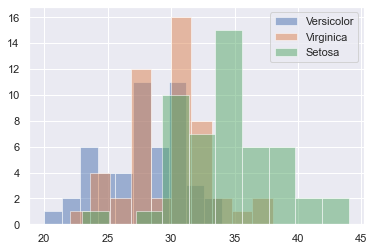

In [17]:
plt.hist(sw_versicolor, label='Versicolor', alpha=0.5)
plt.hist(sw_virginica, label='Virginica', alpha=0.5)
plt.hist(sw_setosa, label='Setosa', alpha=0.5)
plt.legend(loc='best')

### Normality Testing

In [18]:
# Kolmogorov-Smirnov test: Fairly conservative
ks_pl_setosa = stats.kstest(pl_setosa, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats
ks_pl_setosa[1]

7.440151952041566e-44

In [19]:
# Shapiro test
shapiro_pw_setosa = stats.shapiro(pw_setosa)
shapiro_pw_setosa

ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07)

In [20]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
nt_sl_setosa = stats.normaltest(sl_setosa, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
nt_sl_setosa

NormaltestResult(statistic=0.16963916001883134, pvalue=0.9186780173294777)

In [21]:
# Anderson test: Modified KS, returns critical values for a list of significance levels
anderson_sw_setosa = stats.anderson(sw_setosa, dist='norm')
anderson_sw_setosa

AndersonResult(statistic=0.49095595829555094, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Exercise  
- What do the outputs mean?
- How would you extract only the *p*-value of a given test?

In [22]:
print('KS: ', ks_pl_setosa)
print('Shapiro: ', shapiro_pw_setosa)
print('Normal: ', nt_sl_setosa)
print('Anderson: ', anderson_sw_setosa)

KS:  KstestResult(statistic=1.0, pvalue=7.440151952041566e-44)
Shapiro:  ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07)
Normal:  NormaltestResult(statistic=0.16963916001883134, pvalue=0.9186780173294777)
Anderson:  AndersonResult(statistic=0.49095595829555094, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


All of the outputs are the test value and associated *p*-value, except for Anderson test in which the test value is provided along with a table of critical values for given significances

In [23]:
print('KS p-value using index: ', ks_pl_setosa[1])
# or
_ , p_ks_pl_setosa = stats.kstest(pl_setosa, 'norm', mode='asymp')
print('KS p-value using multiple variable assignment: ', p_ks_pl_setosa)

KS p-value using index:  7.440151952041566e-44
KS p-value using multiple variable assignment:  7.440151952041566e-44


### Homogeneity of Variance

In [24]:
# Bartlett test: Requires normal populations
bartlett_length_versicolor = stats.bartlett(pl_versicolor, sl_versicolor)
print(bartlett_length_versicolor)

BartlettResult(statistic=0.06998884643065259, pvalue=0.7913530203660736)


In [25]:
# Levene test: more robust than Bartlett if samples are non-normal. Can define what central tendency measure is used
levene_length_virginica = stats.levene(pl_virginica, sl_virginica, center='trimmed') # For heavy-tailed distributions
print(levene_length_virginica)

LeveneResult(statistic=0.719721200761525, pvalue=0.3984861012481271)


In [26]:
# Fligner-Killeen's test: Non-parametric
fk_length_setosa = stats.fligner(pl_virginica, sl_virginica, center='mean') # For normal distributions
                                                                            # Use 'median' for skewed distributions
print(fk_length_setosa)

FlignerResult(statistic=0.7480415863980018, pvalue=0.3870969853096242)


### Comparing 2 samples of a continuous measure: Parametric tests   
*t*-tests

In [27]:
# t-test of 2 independent samples
ttest_sw_set_ver = stats.ttest_ind(sw_setosa, sw_versicolor, equal_var=True, nan_policy='omit') # equal_var default: T
print(ttest_sw_set_ver)

Ttest_indResult(statistic=9.537093207617902, pvalue=1.224078036914692e-15)


In [28]:
# t-test of paired samples
ttest_width_setosa = stats.ttest_rel(pw_setosa, sw_setosa, nan_policy='omit')
print(ttest_width_setosa)

Ttest_relResult(statistic=-60.96725246979008, pvalue=7.212365087348317e-48)


In [29]:
# t-test from descriptive statistics: mean, SD, n from each sample
ttest_pw_vir_ver = stats.ttest_ind_from_stats(20.06, 2.902, 50, 13.26, 1.977, 50, equal_var=False)
print(ttest_pw_vir_ver)

Ttest_indResult(statistic=13.6933602626047, pvalue=2.3071043100383677e-23)


**Effect sizes**  
Cohen's *d*

*d* = $\frac{\overline{x_1} - \overline{x_2}}{SDp}$  
  
*d*=0.2 small effect size, 0.5 medium, 0.8 large    
  
$SD_p$ (Pooled standard deviation) = $\sqrt[2]{\frac{(N_1-1)(SD_1^2)+(N_2-1)(SD_2^2)}{N_1+N_2-2}}$

#### Exercise  
What is the value of Cohen's *d*?

In [30]:
# Calculate pooled STD
std_sw_set_ver = np.sqrt( ( (sw_setosa.size-1)*(sw_setosa.std()**2) + (sw_versicolor.size-1)*(sw_versicolor.std()**2) ) 
                         / (sw_setosa.size + sw_versicolor.size - 2) )
# Calculate Cohen's d
cohend_sw_set_ver = (sw_setosa.mean() - sw_versicolor.mean()) / std_sw_set_ver
print('Cohen\'s d: ', cohend_sw_set_ver) # d=0.2 small effect size, 0.5 medium, 0.8 large

Cohen's d:  1.9074186415235803


Pearson's correlation coefficient can also be used as a measure of effect size (see below)

In [31]:
1-stats.norm.cdf(ttest_pw_vir_ver[0]) # one-side p-value if I know the test value

0.0

In [32]:
stats.norm.ppf(ttest_pw_vir_ver[1]) # What is the test value given the p-value

-9.889697326376915

### Comparing 2 samples of a continuous measure: Non-Parametric tests 
Wilcoxon rank-sum  
Mann-Whitney U  
Wilcoxon

In [33]:
# Wilcoxon rank-sum test: Can use if n < 20
wrk_sw_set_ver = stats.ranksums(sw_setosa, sw_versicolor)
print(wrk_sw_set_ver)

RanksumsResult(statistic=7.324683617673182, pvalue=2.394629812904166e-13)


In [34]:
# Mann-Whitney U test: More robust than Wilcoxon rank-sum, use if n > 20
mwu_sw_set_ver = stats.mannwhitneyu(sw_setosa, sw_versicolor, use_continuity=True, alternative='greater')
                                    # alternative options: 'less', 'two-sided'. 'None' is deprecated
print(mwu_sw_set_ver)

MannwhitneyuResult(statistic=2312.5, pvalue=1.048170076223835e-13)


In [35]:
# Wilcoxon test: For paired samples
wilcoxon_width_setosa = stats.wilcoxon(pw_setosa, sw_setosa, zero_method='wilcox', correction=False)
                        # zero_method is how zero-differences are handled. Options: 'pratt', 'zsplit'
                        # correction is if statistic is corrected towards the mean during calculation. Default: F
print(wilcoxon_width_setosa)

WilcoxonResult(statistic=0.0, pvalue=7.07734543582959e-10)


**Comparing multiple groups**  
ANOVA  
Kruskal-Wallis H

In [36]:
# 1-way ANOVA: Parametric
anova_sw = stats.f_oneway(sw_setosa, sw_versicolor, sw_virginica)
print(anova_sw)

F_onewayResult(statistic=49.882289862245315, pvalue=2.91767359510435e-17)


*What about post-*hoc* tests, DF, and other results?*  
Not available in the Scipy.stats implementation  
Use of linear regression with the **statsmodels** module allows access to some of that data  

In [37]:
# Kruskal-Wallis H test: Non-parametric
kw_sw = stats.kruskal(sw_setosa, sw_versicolor, sw_virginica, nan_policy='omit')
print(kw_sw)

KruskalResult(statistic=63.92045179729184, pvalue=1.3178022715901975e-14)


### Contingency Tables   
Chi square  
Fisher's exact test

**pd.crosstab(vector1, vector2)** creates a contingency table from two binary vectors

#### Exercise  
Create a contingency table from counts of big and small petal width and sepal width using the mean as cutoff

In [38]:
mean_pw = dataset['Petal_Width'].mean()
mean_sw = dataset['Sepal_Width'].mean()

width_table = pd.crosstab(dataset.Petal_Width > mean_pw, dataset.Sepal_Width > mean_sw)
width_table

Sepal_Width,False,True
Petal_Width,,
False,18,42
True,65,25


In [39]:
# Chi square: Requires a matrix composed of individual arrays or a pd.crosstab result as input 
chi2_width = stats.chi2_contingency(width_table, correction=False) # Correction: Yates'
                                     # Another optional argument: lambda_='pearson'/'log-likelihood'/'freeman-tukey'/
                                     # 'mod-log-likelihood'/'neyman'/'cressie-read'
                                     # lambda_ default is None which computes Pearson's chi2
print(chi2_width)
print('\n')
print(' Chi-square value: ', chi2_width[0], '\n',
      'p-value: ', chi2_width[1], '\n',
      'Degrees of freedom: ', chi2_width[2], '\n',
      'Expected frequencies: ', chi2_width[3], '\n')

(25.966552778277293, 3.473840254460744e-07, 1, array([[33.2, 26.8],
       [49.8, 40.2]]))


 Chi-square value:  25.966552778277293 
 p-value:  3.473840254460744e-07 
 Degrees of freedom:  1 
 Expected frequencies:  [[33.2 26.8]
 [49.8 40.2]] 



In [40]:
# Fisher's exact test: Use if any expected frequency is < 5
fisher_width = stats.fisher_exact([[18,42],
                                   [65,25]], alternative='two-sided') # alternative options: 'less', 'greater'
print(fisher_width)
print('\n')
print(' Odds ratio: ', fisher_width[0], '\n',
      'p-value: ', fisher_width[1])

(0.16483516483516483, 3.90295578087731e-07)


 Odds ratio:  0.16483516483516483 
 p-value:  3.90295578087731e-07


### Correlation  
Pearson's correlation coefficient *r*  
Spearman rank-order correlation coefficient *rho*  
Point-biserial correlation coefficient  
Kendall's *Tau*

In [41]:
# Pearson correlation coefficient: Parametric
pearson_petal = stats.pearsonr(dataset['Petal_Width'], dataset['Petal_Length'])
print(pearson_petal,'\n')
print('Pearson\'s correlation coefficient: ', pearson_petal[0])
print('p-value: ', pearson_petal[1]) # p-value is not so useful or reliable

(0.9559018929491592, 1.2082268268084072e-80) 

Pearson's correlation coefficient:  0.9559018929491592
p-value:  1.2082268268084072e-80


In [42]:
# Spearman rank-order correlation coefficient: Non-parametric
spearman_sepal = stats.spearmanr(dataset['Sepal_Width'], dataset['Sepal_Length'], nan_policy='omit')
print(spearman_sepal)

SpearmanrResult(correlation=-0.16365863235158412, pvalue=0.04537660724195031)


In [43]:
# Point-biserial correlation coefficient: Measures correlation between a binary and a continuous variable
setosa_type = dataset['Type']=='setosa' #Binary variable
pbs_setosa_sw = stats.pointbiserialr(setosa_type, dataset['Sepal_Width'])
print(pbs_setosa_sw)

PointbiserialrResult(correlation=0.6046434695018529, pvalue=2.5402737509750014e-16)


In [44]:
# Kendall's Tau: Non-parametric. Arguments for use: Ordinal data, more robust than Spearman, non-linear relations
ktau_versicolor = stats.kendalltau(pw_versicolor, pl_versicolor, initial_lexsort=None, nan_policy='omit') 
                  # initial_lexsort=False uses quicksort
print(ktau_versicolor)

KendalltauResult(correlation=0.536118435288325, pvalue=4.4140131467923024e-07)


### Linear Regression

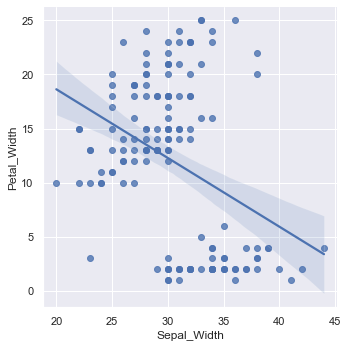

In [45]:
# Scatterplot of variables to include in regression
sns.lmplot(y='Petal_Width', x='Sepal_Width', data=dataset) # Add hue='Type' to observe subgroups

In [46]:
# Scipy linear regression using least-squares. Only works for univariate
scipy_linreg_width = stats.linregress(dataset['Sepal_Width'], dataset['Petal_Width']) # order of x,y != from lmplot
print(scipy_linreg_width)

LinregressResult(slope=-0.6352638635720149, intercept=31.33609524500363, rvalue=-0.36700657444549384, pvalue=3.846024974557698e-06, stderr=0.13235317105294284, intercept_stderr=4.0847628080588105)


**stats.linregress** provides limited information, and the library lacks a logistic regression function.  
Use the **statsmodels** library for regression

In [47]:
import statsmodels.formula.api as smf 

In [48]:
reg_width = smf.ols(formula='Petal_Width ~ Sepal_Width', data=dataset)
reg_width_model = reg_width.fit()
reg_width_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Petal_Width   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     23.04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           3.85e-06
Time:                        20:05:50   Log-Likelihood:                -505.10
No. Observations:                 150   AIC:                             1014.
Df Residuals:                     148   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.3361      4.085      7.671      0.000      23.264      39.408
Sepal_Width    -0.6353      0.132     -4.800      0.000      -0.897      -0.374
==============================================================================
Omnibus:                       12.432   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.318
Skew:                           0.300   Prob(JB):                       0.0425
Kurtosis:                       2.193   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print(reg_width_model.summary()) # This way is better to obtain warnings

                            OLS Regression Results                            
Dep. Variable:            Petal_Width   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     23.04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           3.85e-06
Time:                        20:05:50   Log-Likelihood:                -505.10
No. Observations:                 150   AIC:                             1014.
Df Residuals:                     148   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.3361      4.085      7.671      

In [50]:
print( dir(reg_width_model) )

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_mo

To plot residuals, an important quality control step, we need to use the predict() method. This function takes as input a matrix of predictive variables plus a new column for the intercept. To create this compound matrix we need to use the add_constant() function from the other statsmodels api: **statsmodels.api**

In [51]:
import statsmodels.api as sm

pred_var_matrix = dataset['Sepal_Width']
pred_var_matrix = sm.add_constant(pred_var_matrix)
sm_reg_width = sm.OLS( dataset['Petal_Width'], pred_var_matrix) # Note the difference from smf.ols
sm_reg_width_model = sm_reg_width.fit()

Text(0, 0.5, 'Standardized Predicted Value')

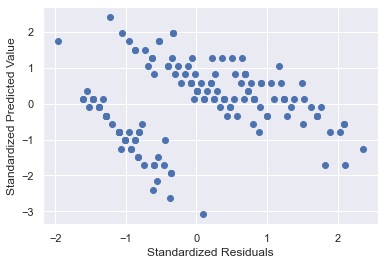

In [52]:
# Plotting residuals:
# Obtain predicted values for dependent variable
predicted_values = reg_width_model.predict(pred_var_matrix) # dataset['Sepal_Width'] is not valid input
sm_predicted_values = sm_reg_width_model.predict(pred_var_matrix)

residuals = dataset['Petal_Width'] - sm_predicted_values
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
normalized_predicted = (sm_predicted_values - np.mean(sm_predicted_values)) / np.std(sm_predicted_values)

plt.plot(normalized_residuals, normalized_predicted, 'o')
plt.xlabel('Standardized Residuals')
plt.ylabel('Standardized Predicted Value')

In [53]:
influence = sm_reg_width_model.get_influence()
influence_dbetas = influence.summary_frame().filter(regex='dfb')
print(influence_dbetas.head(5))

   dfb_const  dfb_Sepal_Width
0   0.040527        -0.054882
1   0.005757         0.014842
2   0.005282         0.013618
3   0.083296        -0.094980
4   0.023999        -0.011416


DFBeta measures the influence a given sample exerts over the model. The maximum value allowed can be calculated as:  
$2^{\sqrt{N}}$

#### Exercise  
Find if any sample exerts an excessive influence over our model

In [54]:
influence_max = 2**(np.sqrt(sm_reg_width_model.nobs)) 
print('Maximum value of DFBeta: ', influence_max)
any(influence_dbetas['dfb_Sepal_Width'] > influence_max)

Maximum value of DFBeta:  4862.386010607465


False

### Logistic Regression

In [55]:
logregr_setosa_sw = sm.Logit(setosa_type, pred_var_matrix)
logregr_setosa_sw_model = logregr_setosa_sw.fit()
print(logregr_setosa_sw_model.summary())

Optimization terminated successfully.
         Current function value: 0.412015
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Type   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.3527
Time:                        20:05:52   Log-Likelihood:                -61.802
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 2.274e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -15.6790      2.614     -5.999      0.000     -20.802     -10.556
Sepal_Width     0.4779    

In [56]:
# Calculate odds ratio
print(np.exp(logregr_setosa_sw_model.params))

const          1.551280e-07
Sepal_Width    1.612628e+00
dtype: float64


#### Exercise  
Plot the data against the values predicted by the model

(-0.05, 1.05)

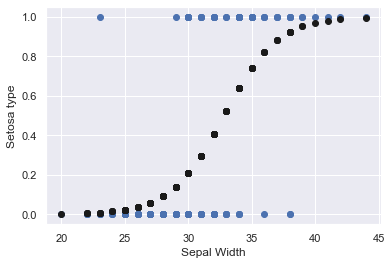

In [57]:
# Plot predicted values vs. data
logregr_predicted_values = logregr_setosa_sw_model.predict(pred_var_matrix)
plt.plot(dataset['Sepal_Width'], setosa_type, 'o')
plt.plot(dataset['Sepal_Width'], logregr_predicted_values,'ok')
plt.xlabel('Sepal Width')
plt.ylabel('Setosa type')
plt.ylim(-0.05, 1.05)